# Assignment Day 12 :
1. Gunakan data iris.csv
2. Jawablah poin-poin assignment yang tertera dibawah

In [ ]:
import pandas as pd
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")

# Plotting Usage
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("1700298484729-iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

## 1. Assignment EDA
Visualisasi di tiap plot numerik, dan tulis insight yang didapat **(point 15)**

In [ ]:
#Tambahkan cell jika perlu

### Scatter Plot

In [ ]:
def plot_scatter(data, x, y, hue):
    sns.scatterplot(x=x, y=y, hue=hue, data=data)
    plt.title(f'{x} vs {y}')
    plt.show()

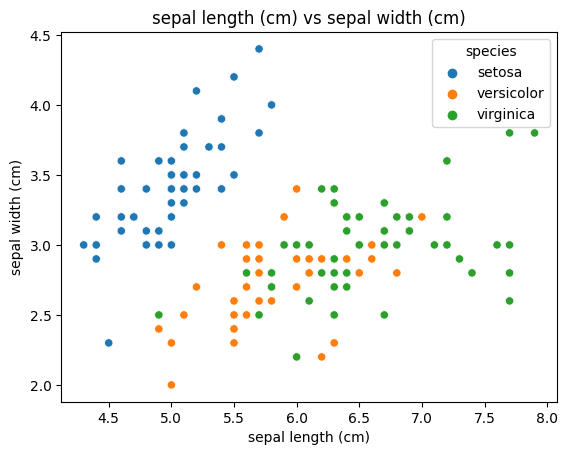

In [ ]:
plot_scatter(df, 'sepal length (cm)', 'sepal width (cm)', 'species')

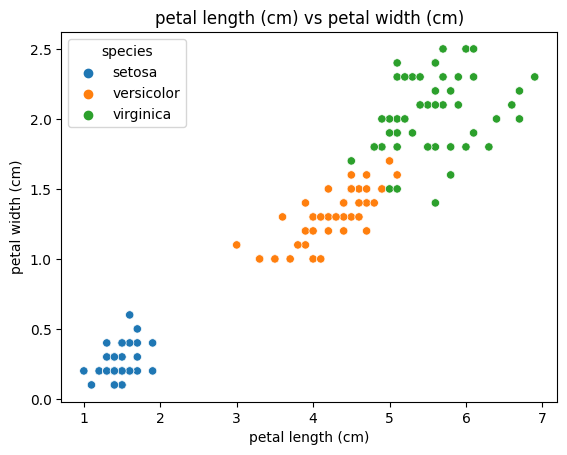

In [ ]:
plot_scatter(df, 'petal length (cm)', 'petal width (cm)', 'species')

### Box Plot

In [ ]:
def plot_box(data, x, y):
    sns.boxplot(x=x, y=y, data=data)
    plt.title(f'Boxplot of {y} by {x}')
    plt.show()

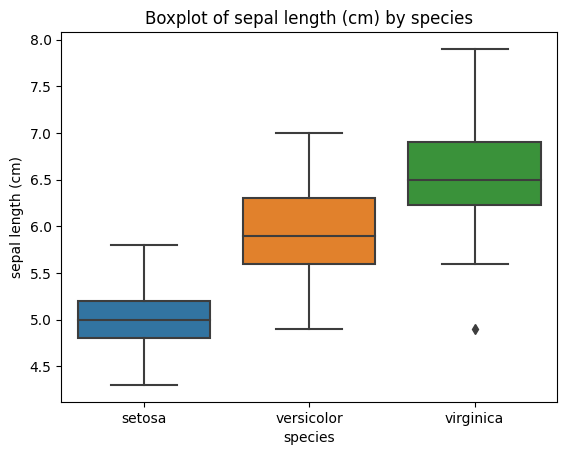

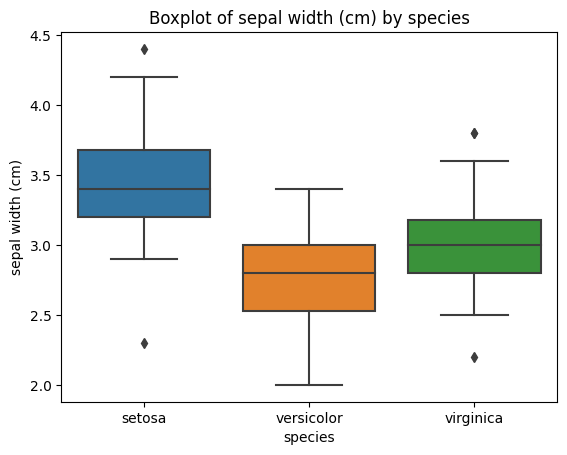

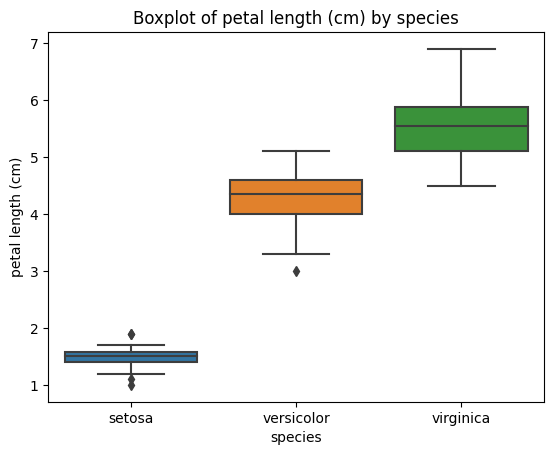

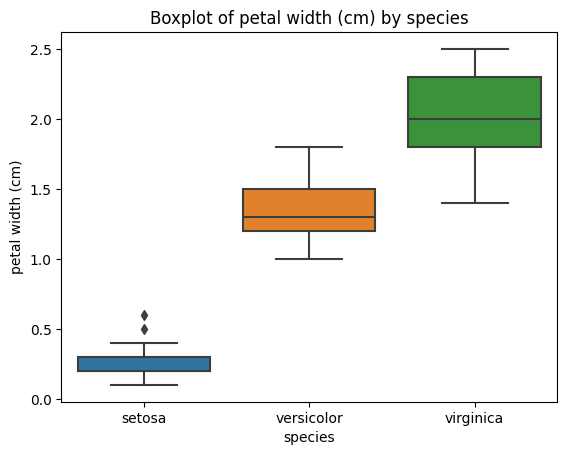

In [ ]:
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
    plot_box(df, 'species', feature)

### Histogram Plot

In [ ]:
def plot_histogram(data, feature):
    sns.histplot(data[feature], bins=10, kde=False)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

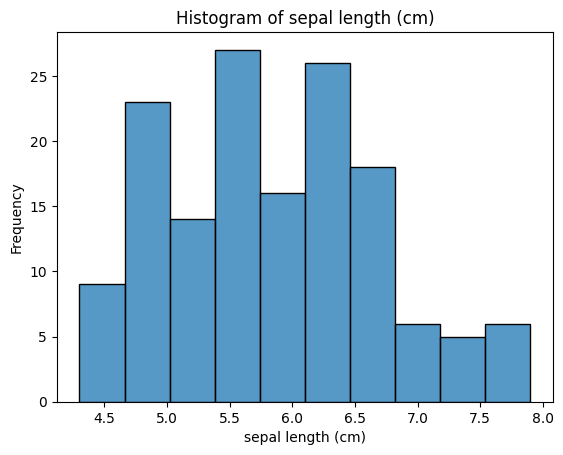

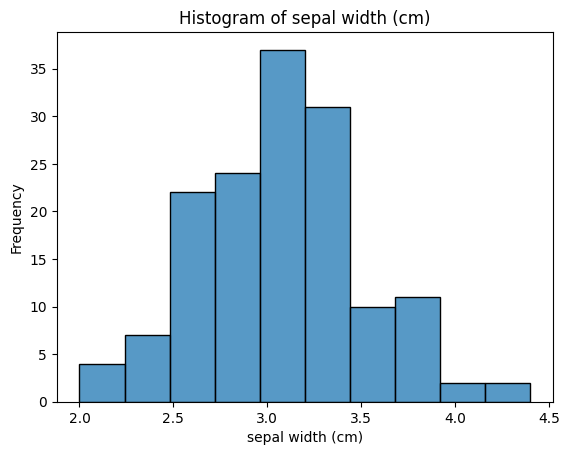

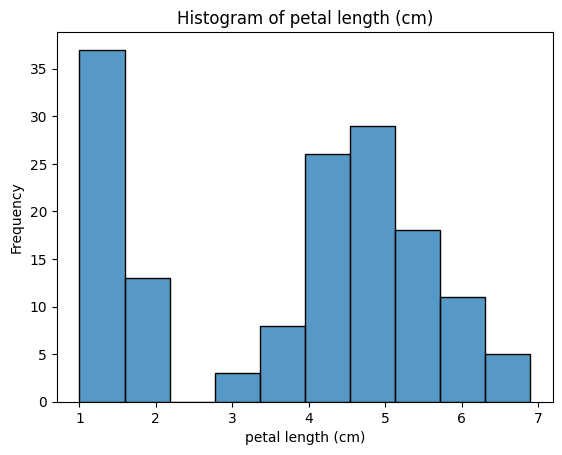

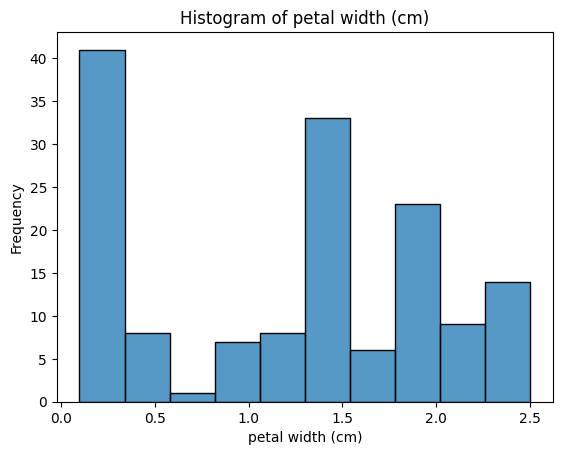

In [ ]:
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
    plot_histogram(df, feature)

### Pair plot

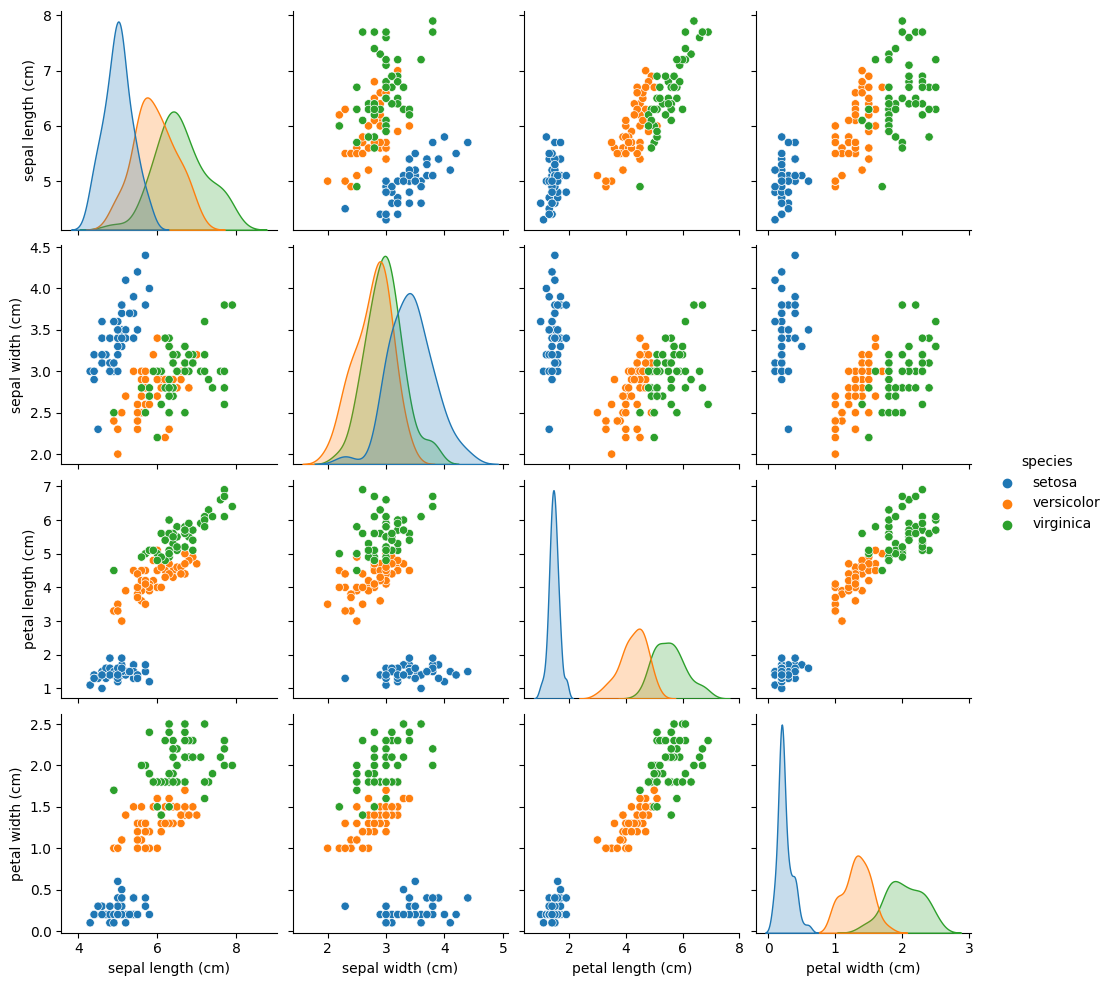

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

### Interpretasi Insight

Berdasarkan Scatterplot, terlihat representasi fitur setosa, versicolor dan virginica, terlihat bahwa sebaran pada setosa lebih jelas dan tidak beririsan dengan versicolor dan virgica, sedangkan keduanya tersebut memiliki irisan yang dapat memengaruhi model dalam melakukan clustering.
Selanjutnya pada box plot terlihat tanda berlian yang berada diluar box, namun terlihat bahwa data cukup bersih sehingga tidak perlu dilakukan outlier handling.
Pada histplot terihat bahwa untuk sepal terlihat distribusi yang norma, lalu pada petal terlihat condong ke kiri.

## 2. Assignment Feature Engineering (Poin 15)
1. Drop duplikat
2. Outlier Handling (Silahkan bisa dilakukan bisa tidak, cantumkan alasan saudara jika menggunakan teknik outlier handling)
3. Feature Scalling (Pilih salah satu : MinMaxScaller atau Standar Scaller)

In [ ]:
#Tambahkan cell jika perlu

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {df.shape[0]}")

df = df.drop_duplicates().reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 150
Dataframe dimension after duplication drop 149


In [ ]:
X = df.iloc[:, 0:4]
y = df.iloc[:, -1]

In [ ]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_scalling = pd.DataFrame(data = X_std, columns = columns )
df_scalling.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,1.049124e-15,1.669060e-16,-1.430623e-16,-4.768743e-16
std,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00
min,-1.864149e+00,-2.436862e+00,-1.560289e+00,-1.440192e+00
25%,-8.980334e-01,-5.972549e-01,-1.219738e+00,-1.177055e+00
50%,-5.268246e-02,-1.373532e-01,3.127435e-01,1.386329e-01
75%,6.719041e-01,5.524994e-01,7.668121e-01,7.964768e-01
max,2.483370e+00,3.081959e+00,1.788466e+00,1.717458e+00


## 3. Assignment K-Means (Point 25)
1. Elbow Method **(point 10)**
2. Via Score Plot **(point 10)**
3. Evaluasi model **(Point 5)**
### 1. Elbow Method

In [ ]:
#Tambahkan cell jika perlu

Text(0, 0.5, 'Intertia / WSS')

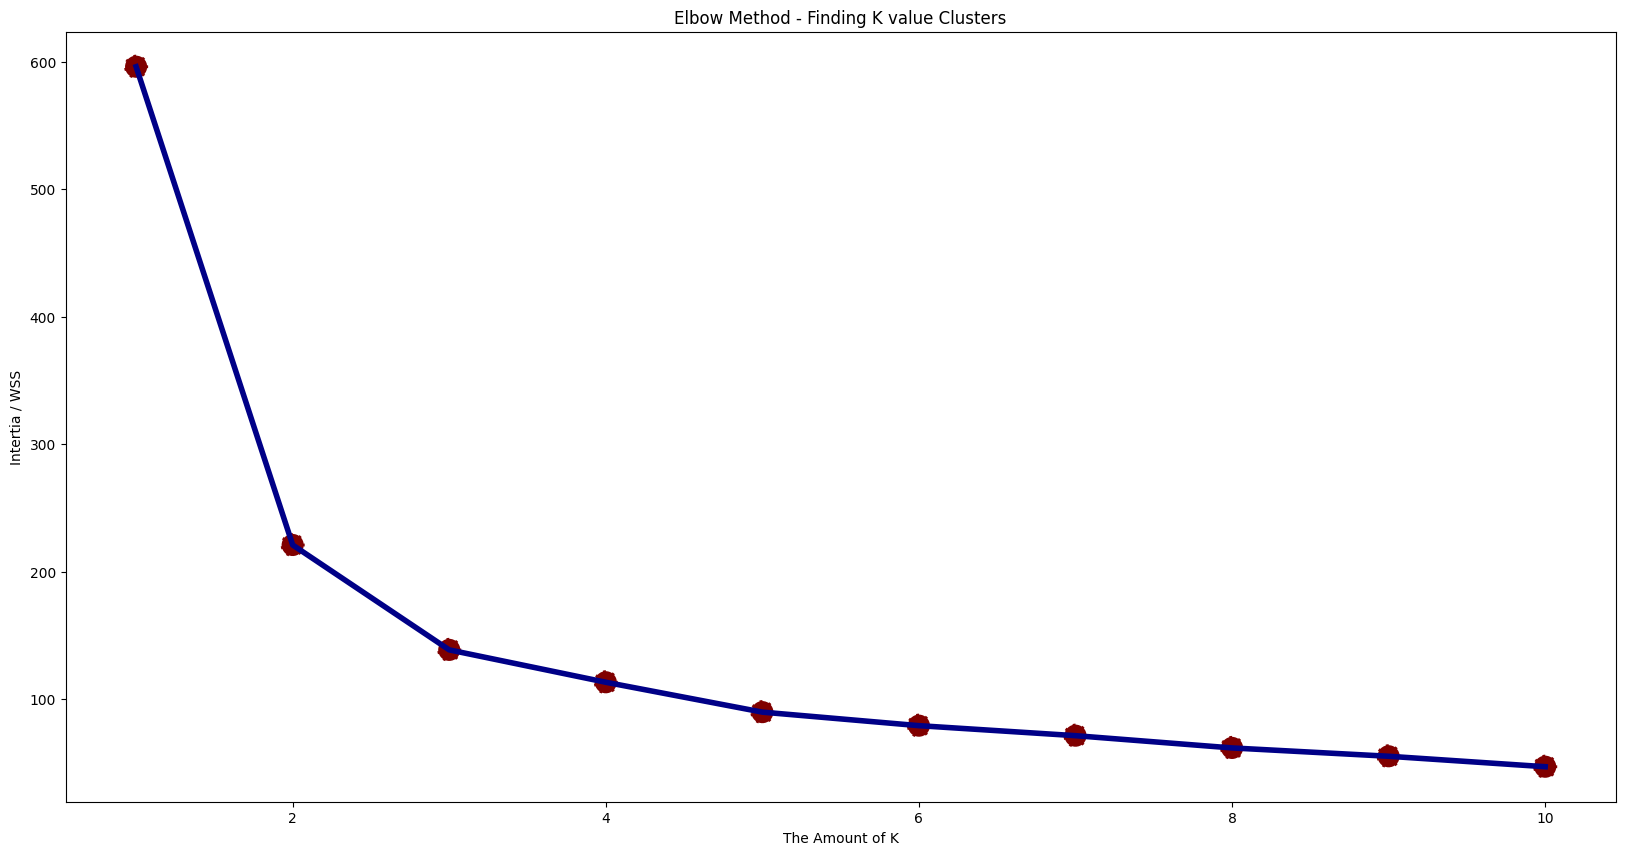

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scalling.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Elbow Method - Finding K value Clusters')
plt.xlabel('The Amount of K')
plt.ylabel('Intertia / WSS')

In [ ]:
from sklearn.cluster import KMeans
kmeans_elbow = KMeans(n_clusters=3, random_state=0)
kmeans_elbow.fit(df_scalling.values)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df['cluster_elbow'] = kmeans_elbow.labels_

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

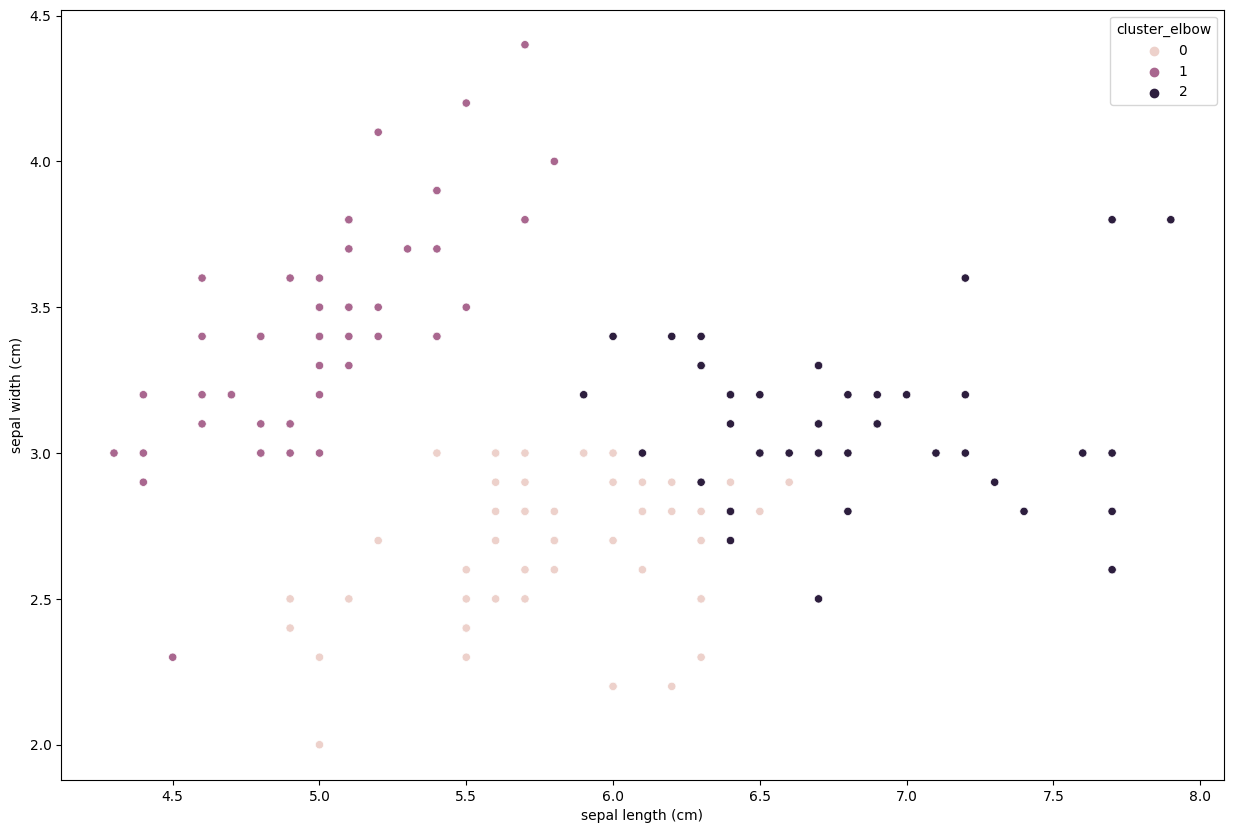

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster_elbow')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

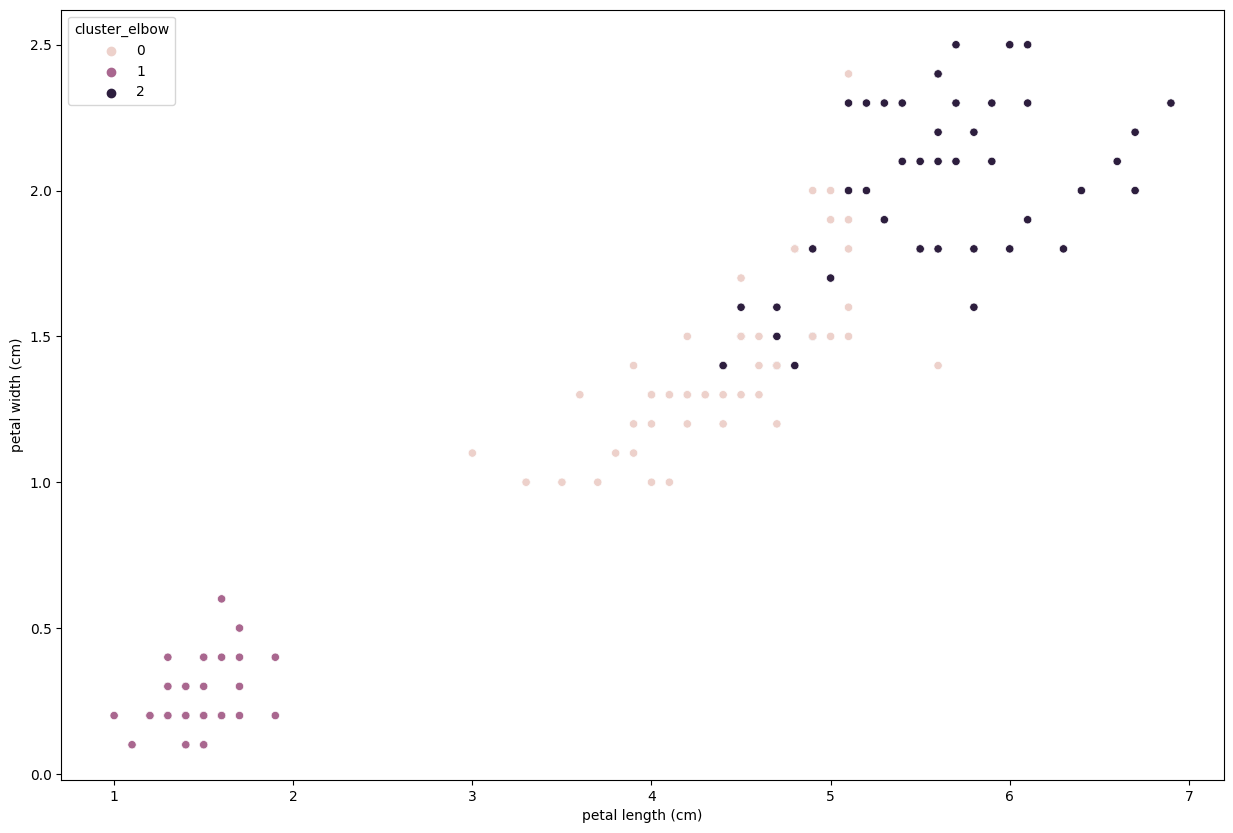

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster_elbow')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

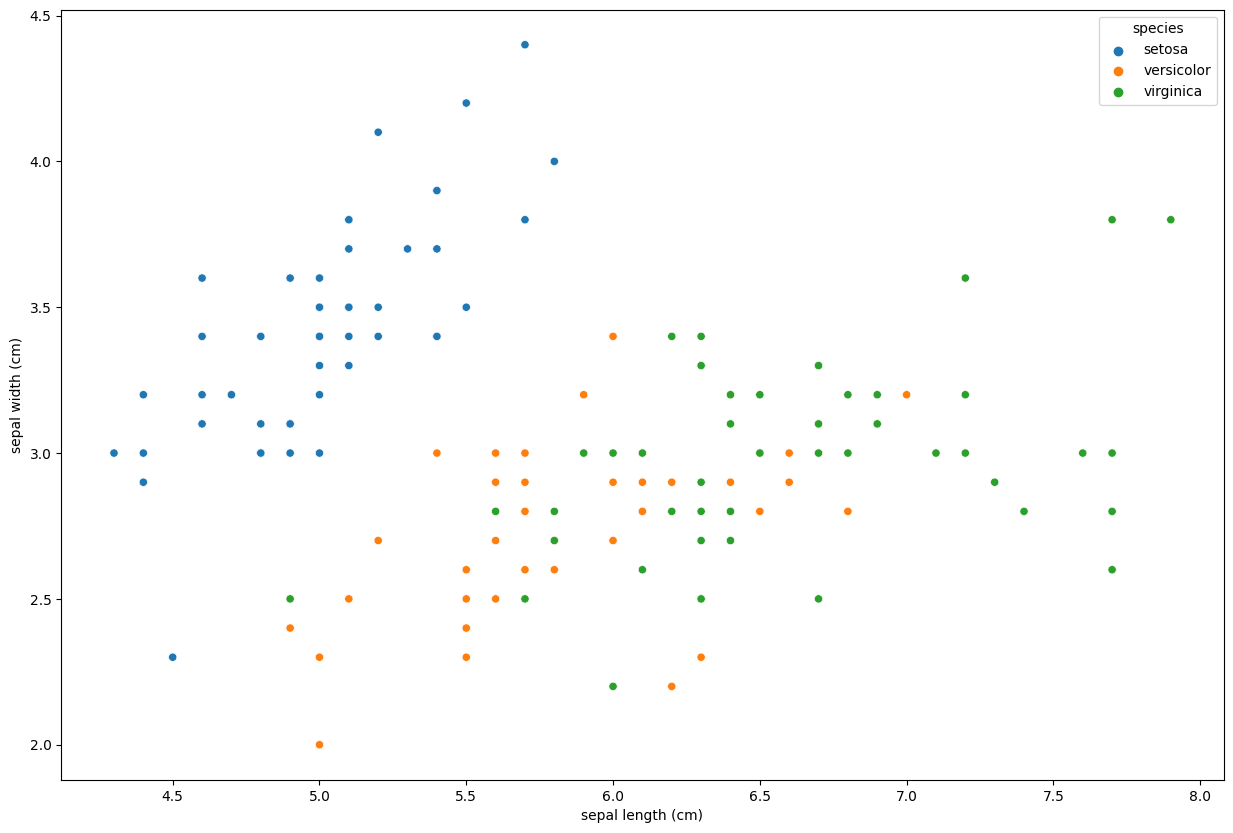

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

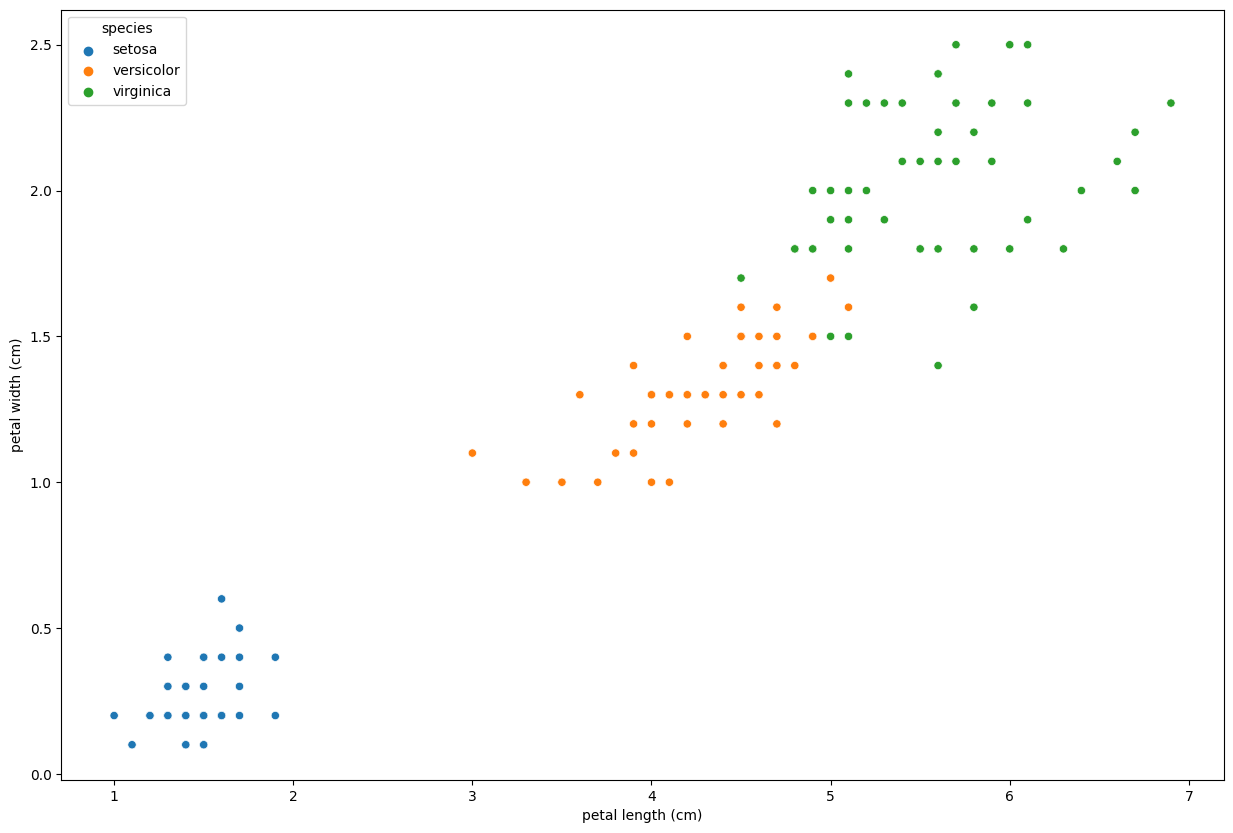

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')

### Interpretasi dan Hasil Evaluasi
hasil elbow method sudah optimal dimana didapatkan cluster cocok dengan label, yaitu:
1. versicolor = 0
2. setosa = 1
3. virginica = 2

### 2. Via Score Plot

In [ ]:
#Tambahkan cell jika perlu

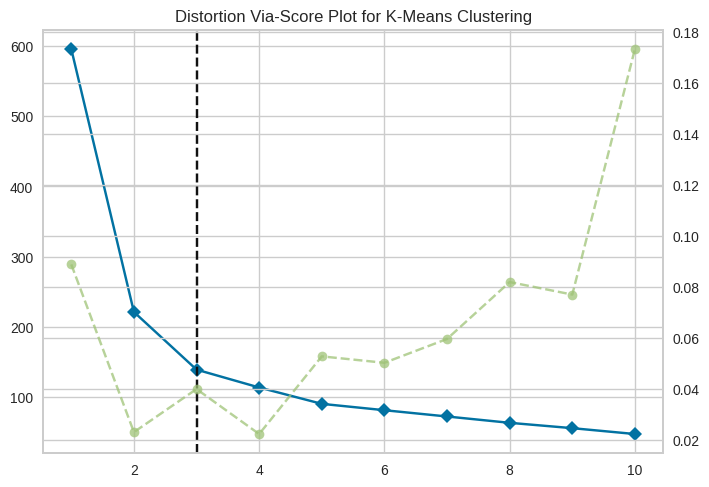

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
k_means_via = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(k_means_via, k=(1,11), timings= True)
visualizer.fit(df_scalling.values)        # Fit the data to the visualizer
plt.title('Distortion Via-Score Plot for K-Means Clustering')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans_via = KMeans(n_clusters=3, random_state=0)
kmeans_via.fit(df_scalling.values)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df['cluster_via'] = kmeans_via.labels_

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow,cluster_via
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1
...,...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica,2,2
145,6.3,2.5,5.0,1.9,virginica,0,0
146,6.5,3.0,5.2,2.0,virginica,2,2
147,6.2,3.4,5.4,2.3,virginica,2,2


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

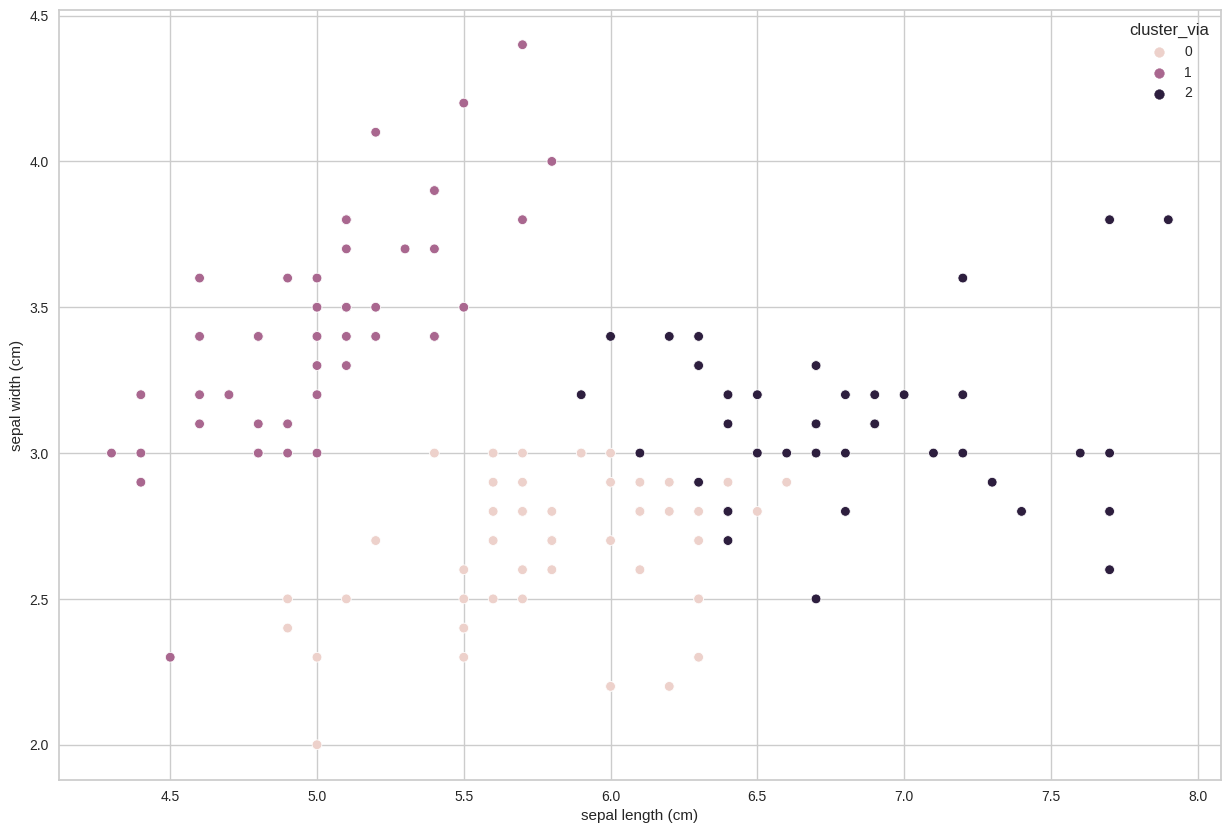

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster_via')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

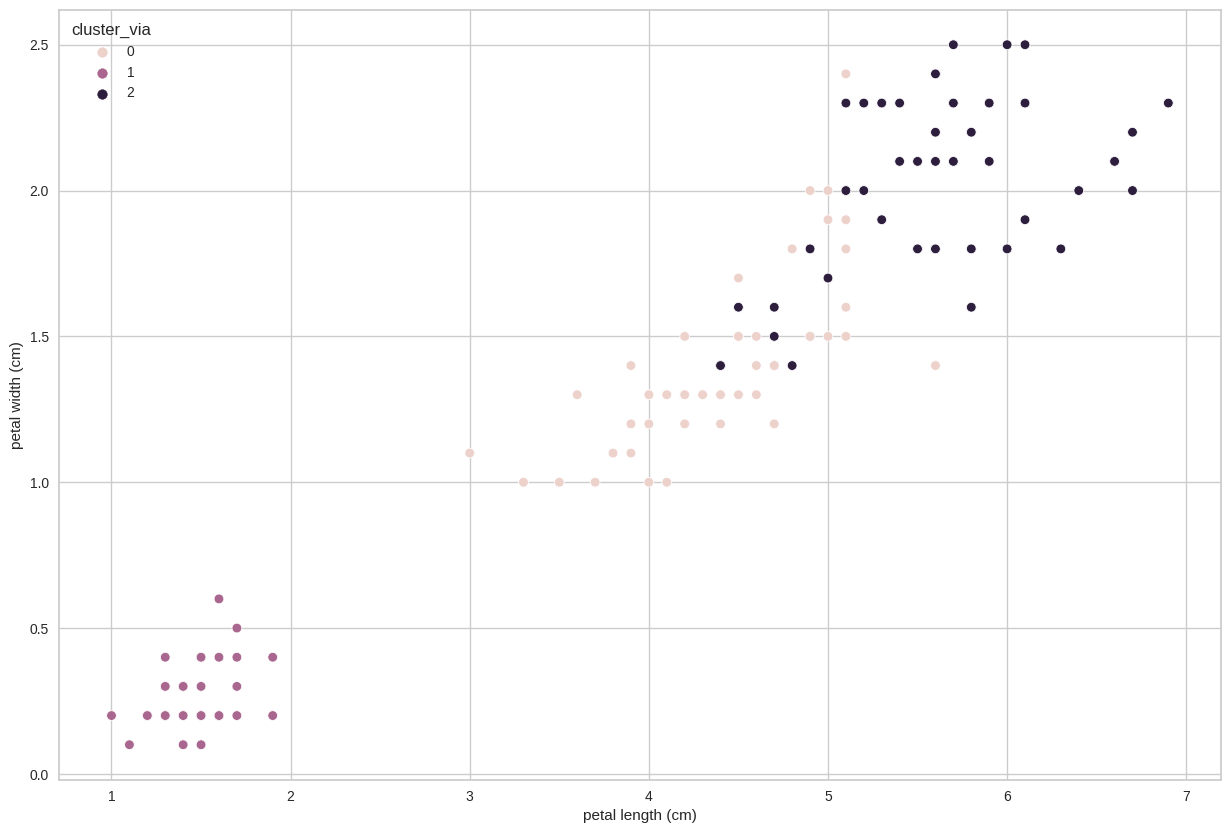

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster_via')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

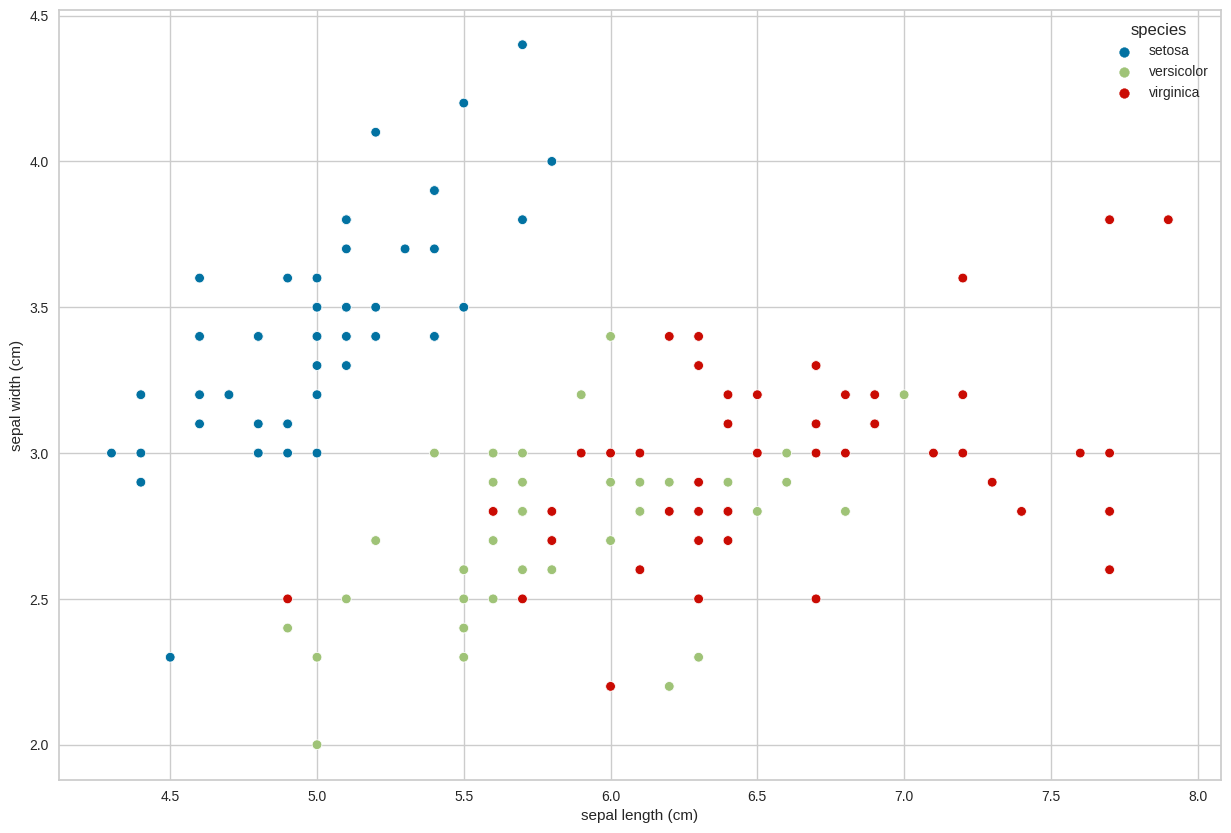

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

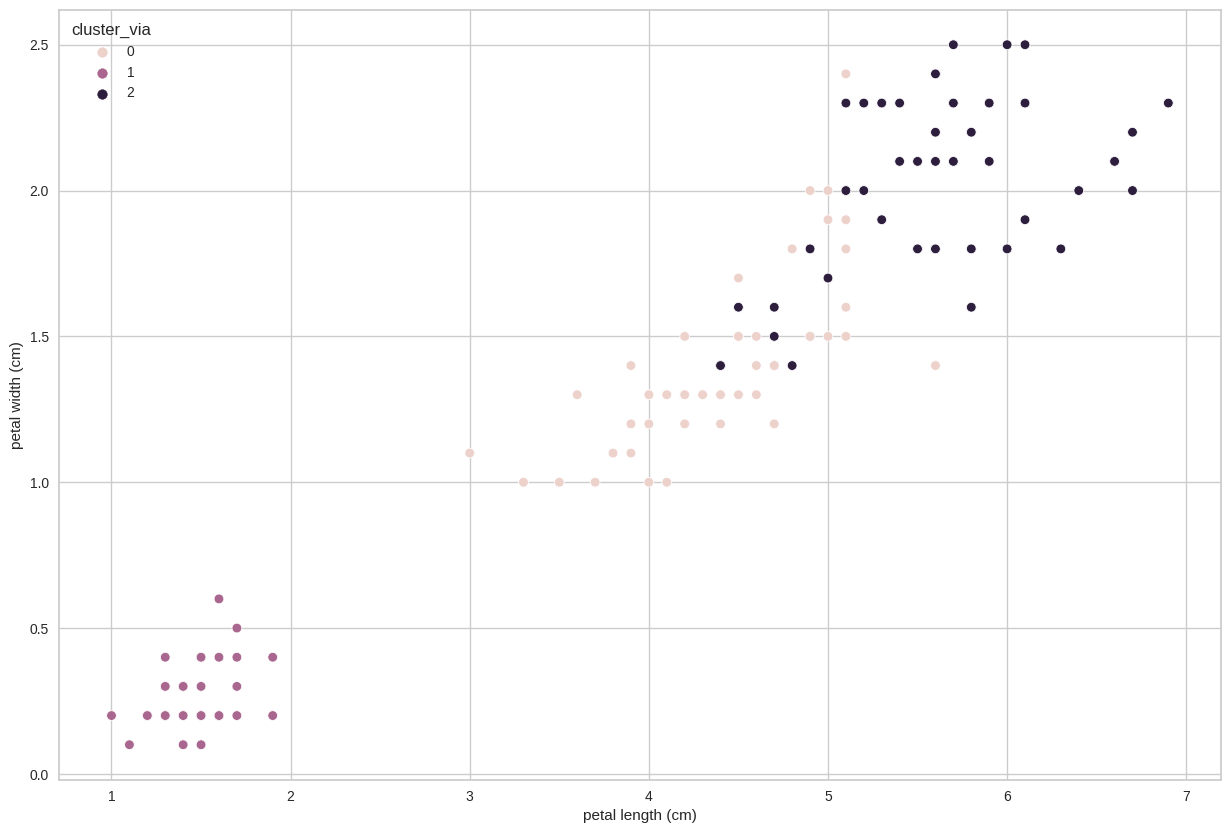

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster_via')

### Interpretasi dan Hasil Evaluasi
Berdasarkan score plot didapatkan nilai 3 untuk melakukan clustering, dengan hasil yang lumayan optimal dimana model mampu meng cluster dengan baik dan lumayan cocok dengan label, walaupun terdapat beberapa hasil cluster yang belum sesuai terutama pada versicolor dan virginica:
1. versicolor = 0
2. setosa = 1
3. virginica = 2

## 4. Assignment Multiclass (Point 25)
1. gunakan : Logistic Regression, Naive Bayes, KNN, SVM **(point 10)**
2. gunakan parameter model berbeda (parameter model dibahas di day 8) atau default (poin plus jika menggunakan parameter model berbeda) **(point 10)**
3. Evaluasi model **(point 5)**

### Referensi parameter model :
1. KNN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2. Logistic Regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
4. Naive Bayes : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
#Tambahkan cell jika perlu

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow,cluster_via
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


In [ ]:
df.cluster_elbow.value_counts(normalize=True)

0    0.348993
1    0.335570
2    0.315436
Name: cluster_elbow, dtype: float64

In [ ]:
df_multi = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'cluster_elbow']]
df_multi.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_multi, test_size = 0.25, random_state = 42, stratify=df_multi.cluster_elbow)
#Splitting

In [ ]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
88,5.6,3.0,4.1,1.3,versicolor,0
123,6.3,2.7,4.9,1.8,virginica,0
30,4.8,3.1,1.6,0.2,setosa,1
18,5.7,3.8,1.7,0.3,setosa,1
44,5.1,3.8,1.9,0.4,setosa,1


In [ ]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
114,5.8,2.8,5.1,2.4,virginica,0
43,5.0,3.5,1.6,0.6,setosa,1
99,5.7,2.8,4.1,1.3,versicolor,0
49,5.0,3.3,1.4,0.2,setosa,1
148,5.9,3.0,5.1,1.8,virginica,0


In [ ]:
X_train = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X_test = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Target (y)
y_train = train[['cluster_elbow']]
y_test = test[['cluster_elbow']]

### Logistic regression

In [ ]:
#import model classification for multiclass
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.metrics import accuracy_score, classification_report #Evaluation matrix

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                              intercept_scaling=1, solver='lbfgs',)
lr_model.fit(X_train, y_train.values.ravel())
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)

### SVM

In [ ]:
# SVM
svm_model = SVC(kernel='linear', degree=3, gamma='scale', coef0=0.0,
                shrinking=True, probability=False, tol=0.001, cache_size=200,
                decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train.values.ravel())
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

### Naive bayes

In [ ]:
# Naive Bayes
nb_model = GaussianNB(var_smoothing=0.05)
nb_model.fit(X_train, y_train.values.ravel())
nb_pred_train = nb_model.predict(X_train)
nb_pred_test = nb_model.predict(X_test)
#Akurasi yang muncul ialah akurasi dari rata-rata terhadap semua label multiclass classification

### KNN

In [ ]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                                 p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn_model.fit(X_train, y_train.values.ravel())
knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

### Evaluasi

logistic regresion

In [ ]:
print("Logistic Regression:")
print("Accuracy train:", accuracy_score(y_train, lr_pred_train))
print("Accuracy test:", accuracy_score(y_test, lr_pred_test))
print(classification_report(y_test, lr_pred_test))
#Akurasi yang muncul ialah akurasi dari rata-rata terhadap semua label multiclass classification

Logistic Regression:
Accuracy train: 0.990990990990991
Accuracy test: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00        13
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



svm

In [ ]:
# Evaluasi model
print("SVM:")
print("Accuracy train:", accuracy_score(y_train, svm_pred_train))
print("Accuracy test:", accuracy_score(y_test, svm_pred_test))
print(classification_report(y_test, svm_pred_test))

SVM:
Accuracy train: 0.963963963963964
Accuracy test: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      1.00      1.00        13
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



knn

In [ ]:
print("KNN:")
print("Accuracy train:", accuracy_score(y_train, knn_pred_train))
print("Accuracy test:", accuracy_score(y_test, knn_pred_test))
print(classification_report(y_test, knn_pred_test))

KNN:
Accuracy train: 0.990990990990991
Accuracy test: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       1.00      1.00      1.00        13
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



naive bayes

In [ ]:
print("\nNaive Bayes:")
print("Accuracy train:", accuracy_score(y_train, nb_pred_train))
print("Accuracy test:", accuracy_score(y_test, nb_pred_test))
print(classification_report(y_test, nb_pred_test))


Naive Bayes:
Accuracy train: 0.954954954954955
Accuracy test: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       1.00      1.00      1.00        13
           2       0.90      0.75      0.82        12

    accuracy                           0.89        38
   macro avg       0.90      0.89      0.89        38
weighted avg       0.90      0.89      0.89        38



## 5. Bonus (Point 20) : Tulis Interpretasi dan Insight di tiap model + evaluasi model dan EDA dengan alasan kalian.

In [ ]:
#Tambahkan cell jika perlu

In [ ]:
df_multi.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
88,5.6,3.0,4.1,1.3,versicolor,0
123,6.3,2.7,4.9,1.8,virginica,0
30,4.8,3.1,1.6,0.2,setosa,1
18,5.7,3.8,1.7,0.3,setosa,1
44,5.1,3.8,1.9,0.4,setosa,1


In [ ]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
114,5.8,2.8,5.1,2.4,virginica,0
43,5.0,3.5,1.6,0.6,setosa,1
99,5.7,2.8,4.1,1.3,versicolor,0
49,5.0,3.3,1.4,0.2,setosa,1
148,5.9,3.0,5.1,1.8,virginica,0


In [ ]:
lr_pred_train

array([0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1,
       0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1,
       2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0,
       2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       0], dtype=int32)

In [ ]:
lr_pred_test

array([0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
lr_pred_train_df = pd.DataFrame(data=lr_pred_train, columns=['prediksi_ml'])
lr_pred_train_df

,prediksi_ml
0,0
1,0
2,1
3,1
4,1
...,...
106,1
107,0
108,2
109,2


In [ ]:
# Reset index pada DataFrame train
train_reset_index = train.reset_index(drop=True)

# Concatenate DataFrame prediksi_ml dengan DataFrame train yang telah di-reset index
train = pd.concat([train_reset_index, lr_pred_train_df], axis=1)
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow,prediksi_ml
0,5.6,3.0,4.1,1.3,versicolor,0,0
1,6.3,2.7,4.9,1.8,virginica,0,0
2,4.8,3.1,1.6,0.2,setosa,1,1
3,5.7,3.8,1.7,0.3,setosa,1,1
4,5.1,3.8,1.9,0.4,setosa,1,1


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

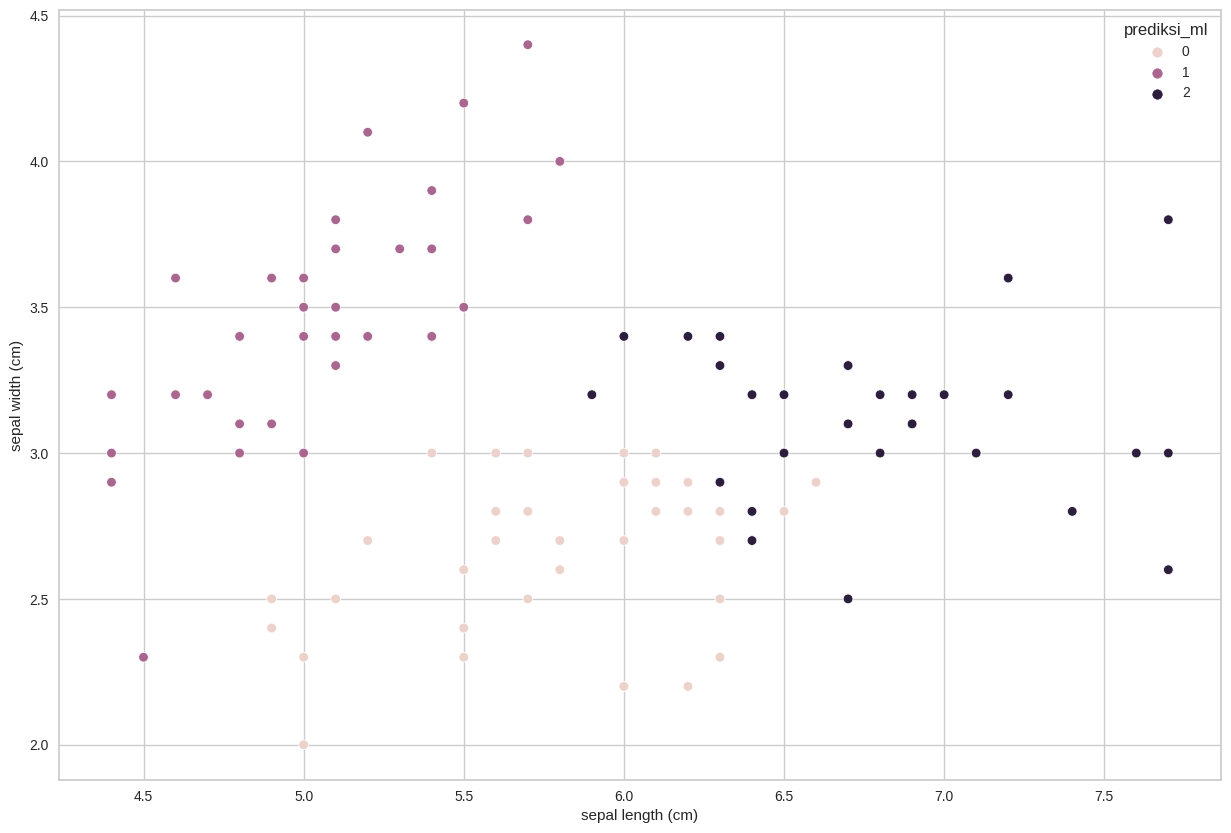

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=train, x='sepal length (cm)', y='sepal width (cm)', hue='prediksi_ml')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

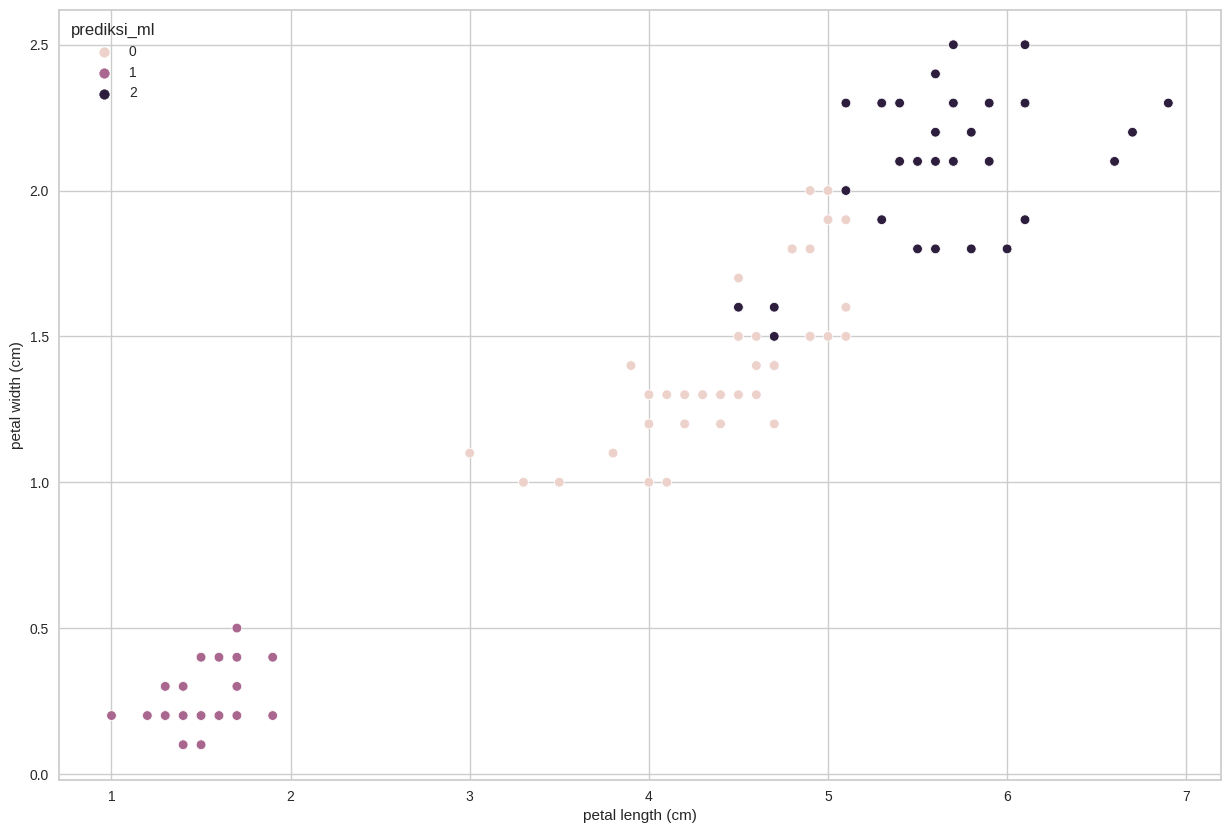

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=train, x='petal length (cm)', y='petal width (cm)', hue='prediksi_ml')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

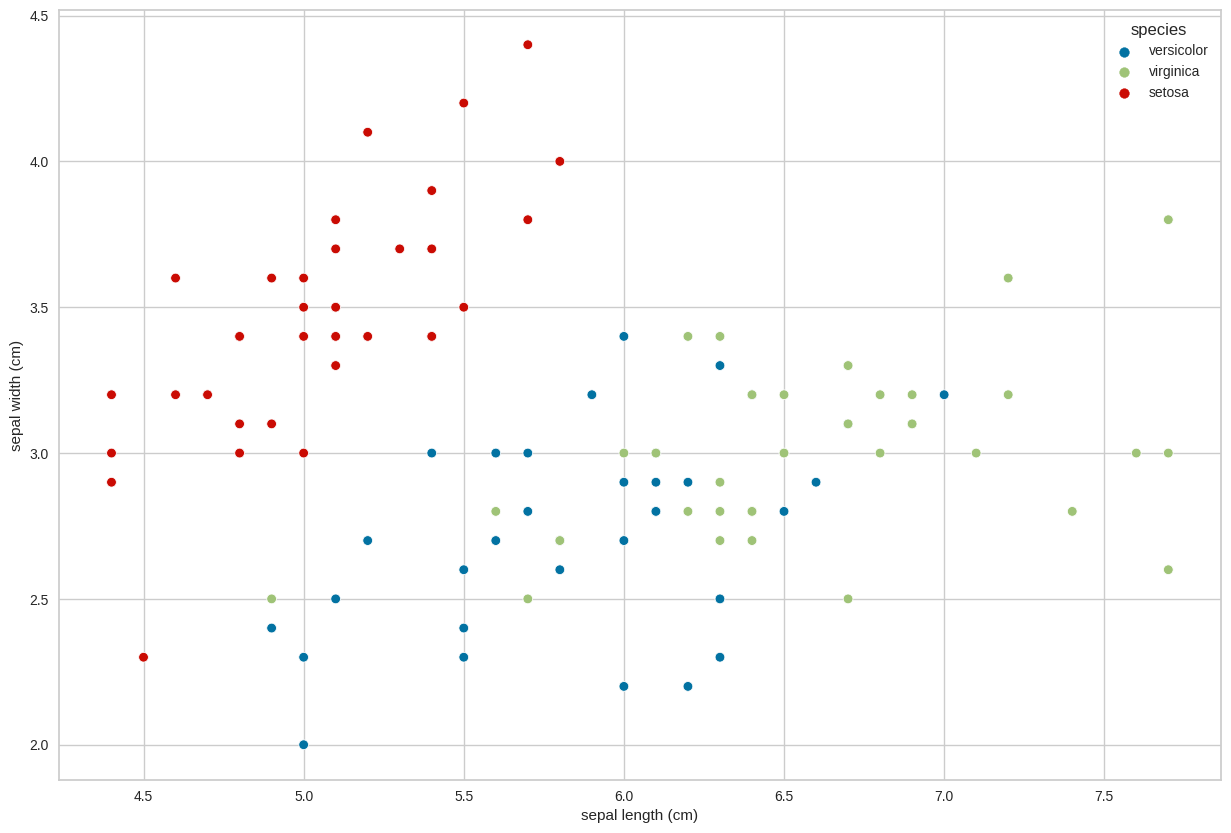

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=train, x='sepal length (cm)', y='sepal width (cm)', hue='species')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

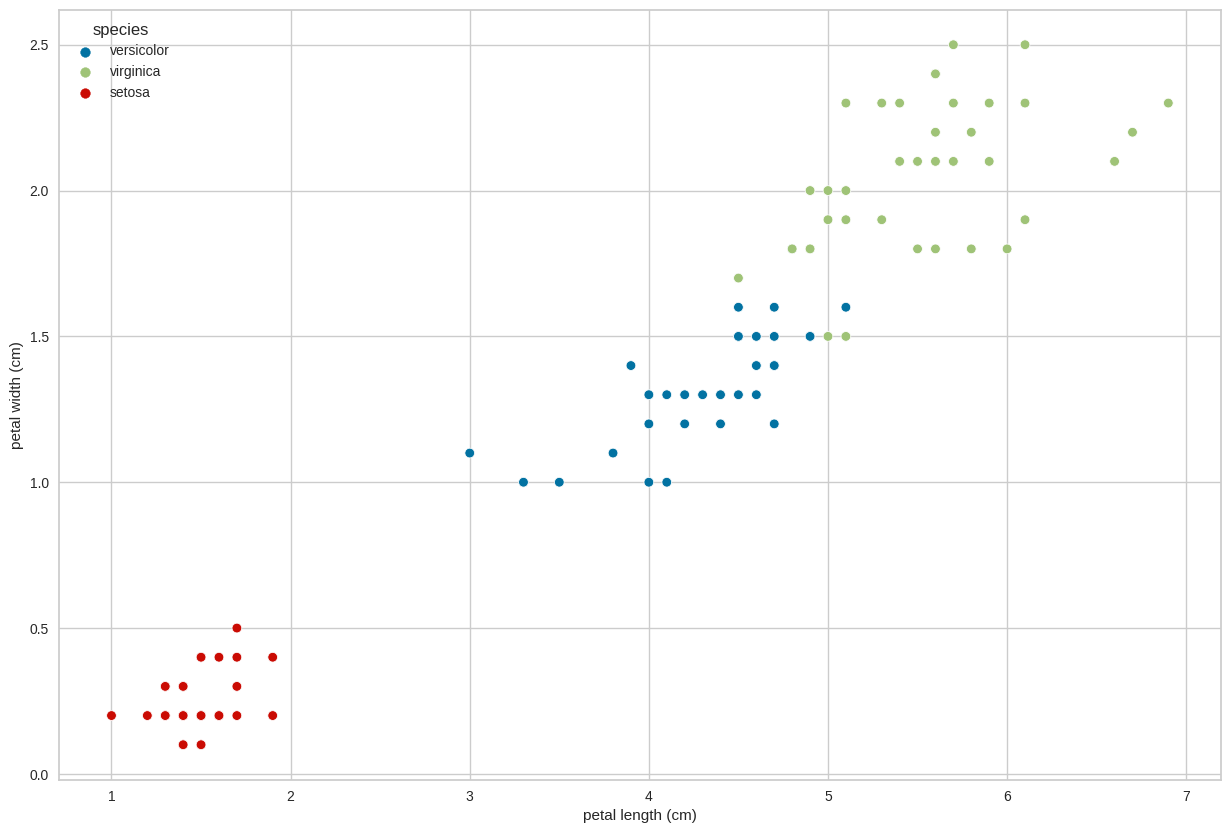

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=train, x='petal length (cm)', y='petal width (cm)', hue='species')

In [ ]:
# Jika nb_pred_test merupakan numpy array, Anda dapat mengonversinya ke DataFrame seperti ini:
lr_pred_test_df = pd.DataFrame(data=lr_pred_test, columns=['prediksi_ml'])
lr_pred_test_df

,prediksi_ml
0,0
1,1
2,0
3,1
4,0
5,1
6,2
7,2
8,2
9,2


In [ ]:
test_reset_index = test.reset_index(drop=True)

# Concatenate DataFrame prediksi_ml dengan DataFrame test yang telah di-reset index
test = pd.concat([test_reset_index, lr_pred_test_df], axis=1)
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow,prediksi_ml
0,5.8,2.8,5.1,2.4,virginica,0,0
1,5.0,3.5,1.6,0.6,setosa,1,1
2,5.7,2.8,4.1,1.3,versicolor,0,0
3,5.0,3.3,1.4,0.2,setosa,1,1
4,5.9,3.0,5.1,1.8,virginica,0,0


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

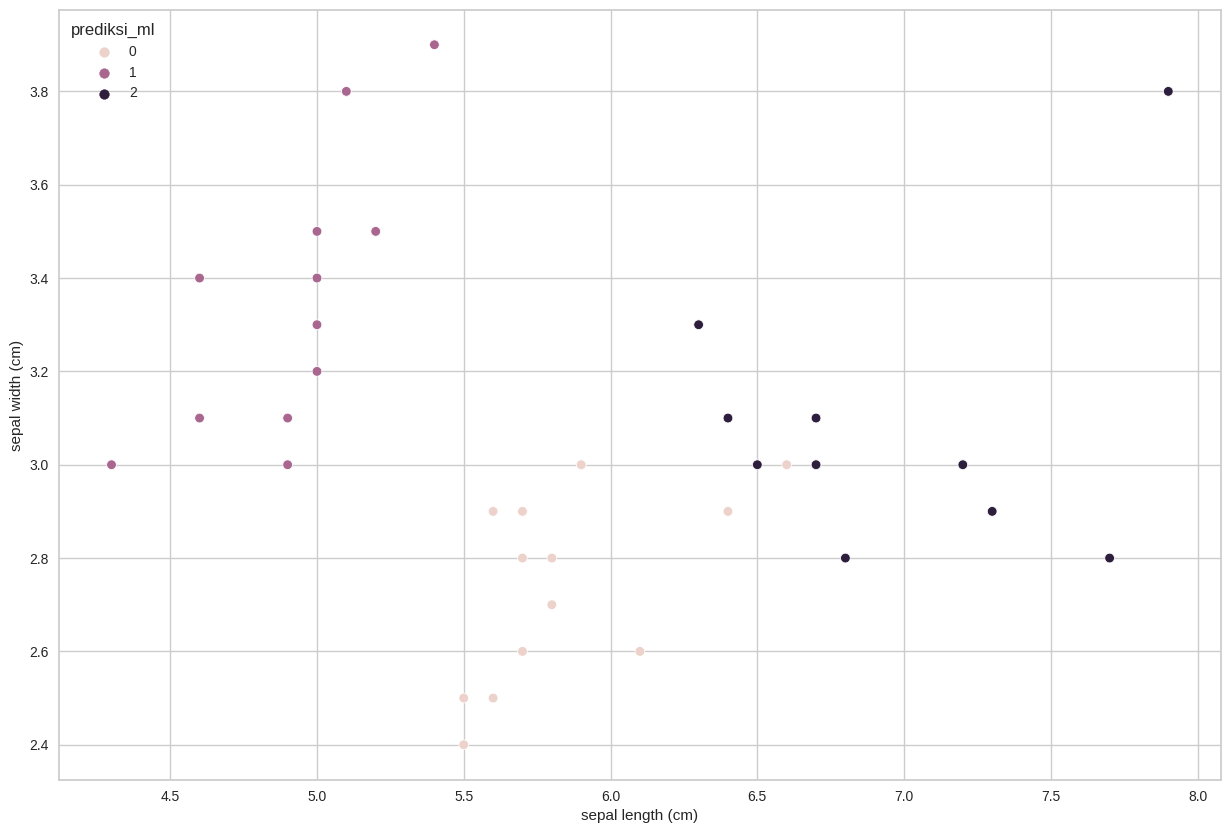

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=test, x='sepal length (cm)', y='sepal width (cm)', hue='prediksi_ml')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

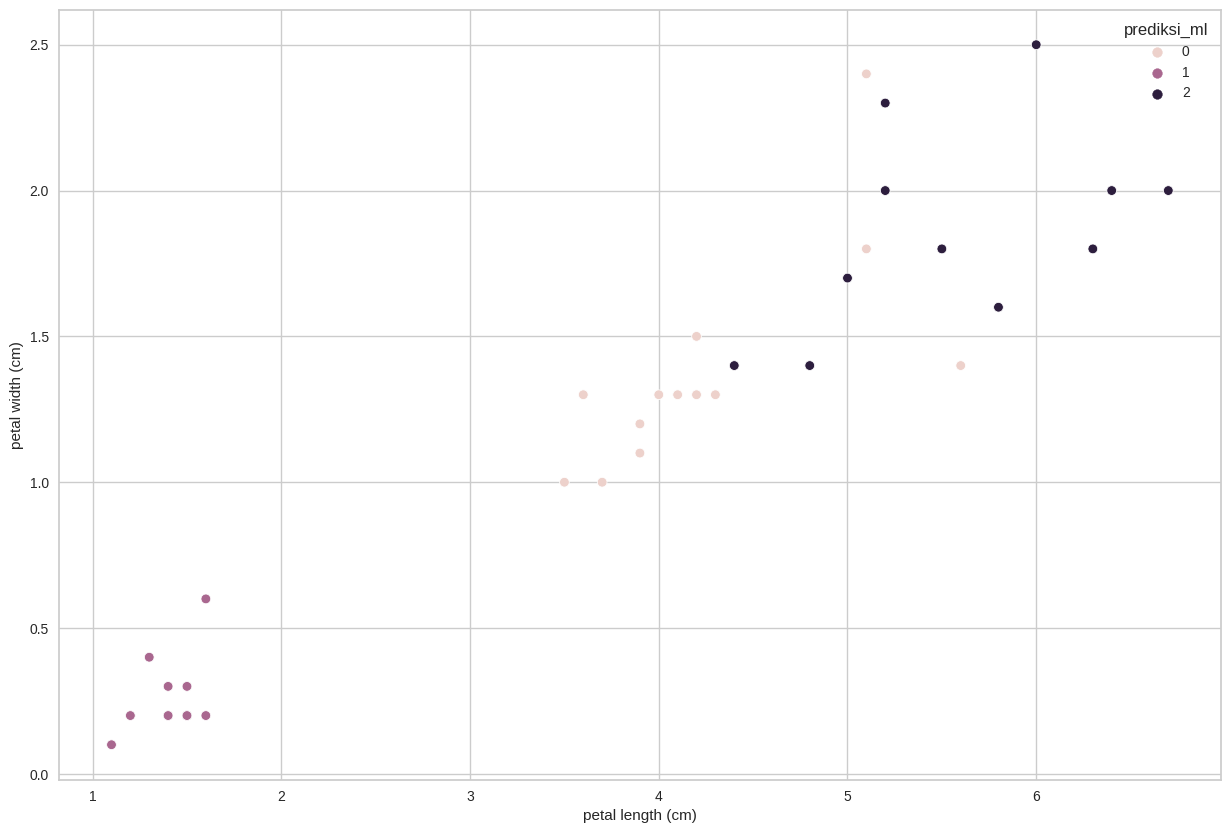

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=test, x='petal length (cm)', y='petal width (cm)', hue='prediksi_ml')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

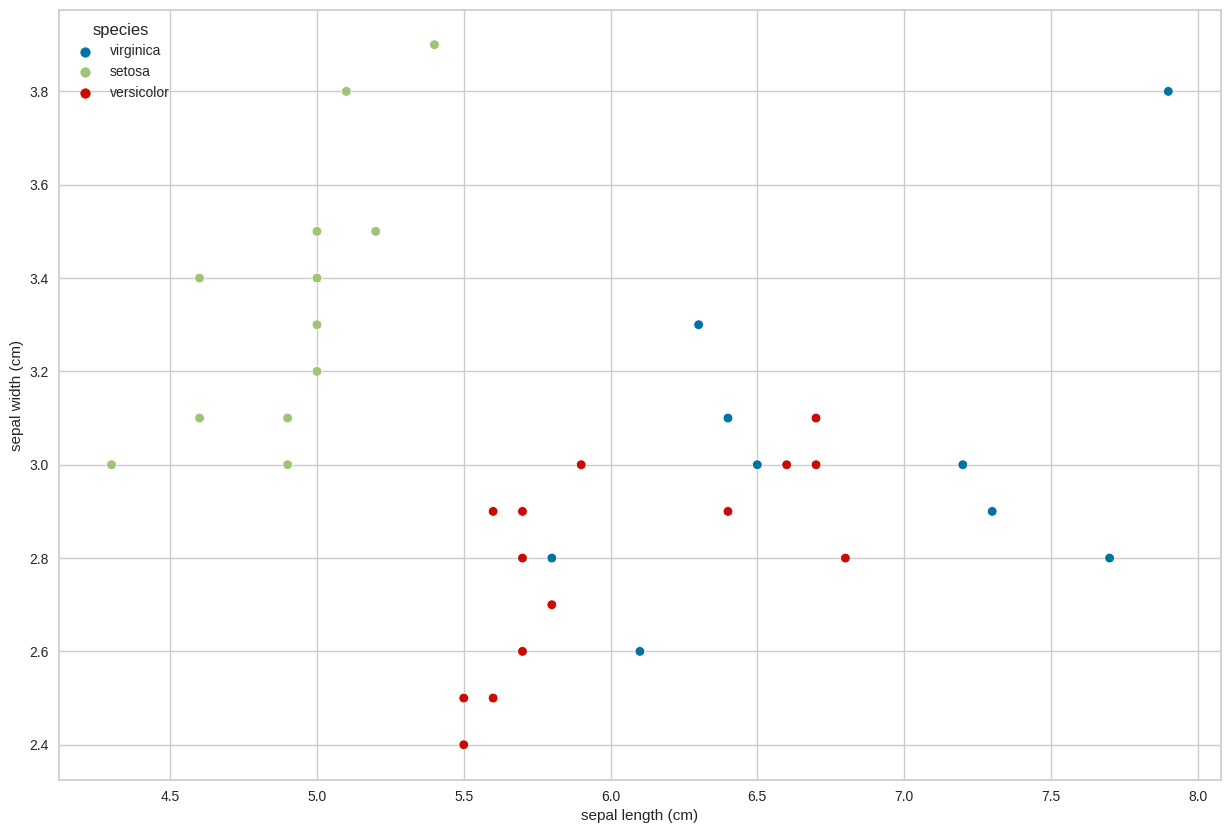

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=test, x='sepal length (cm)', y='sepal width (cm)', hue='species')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

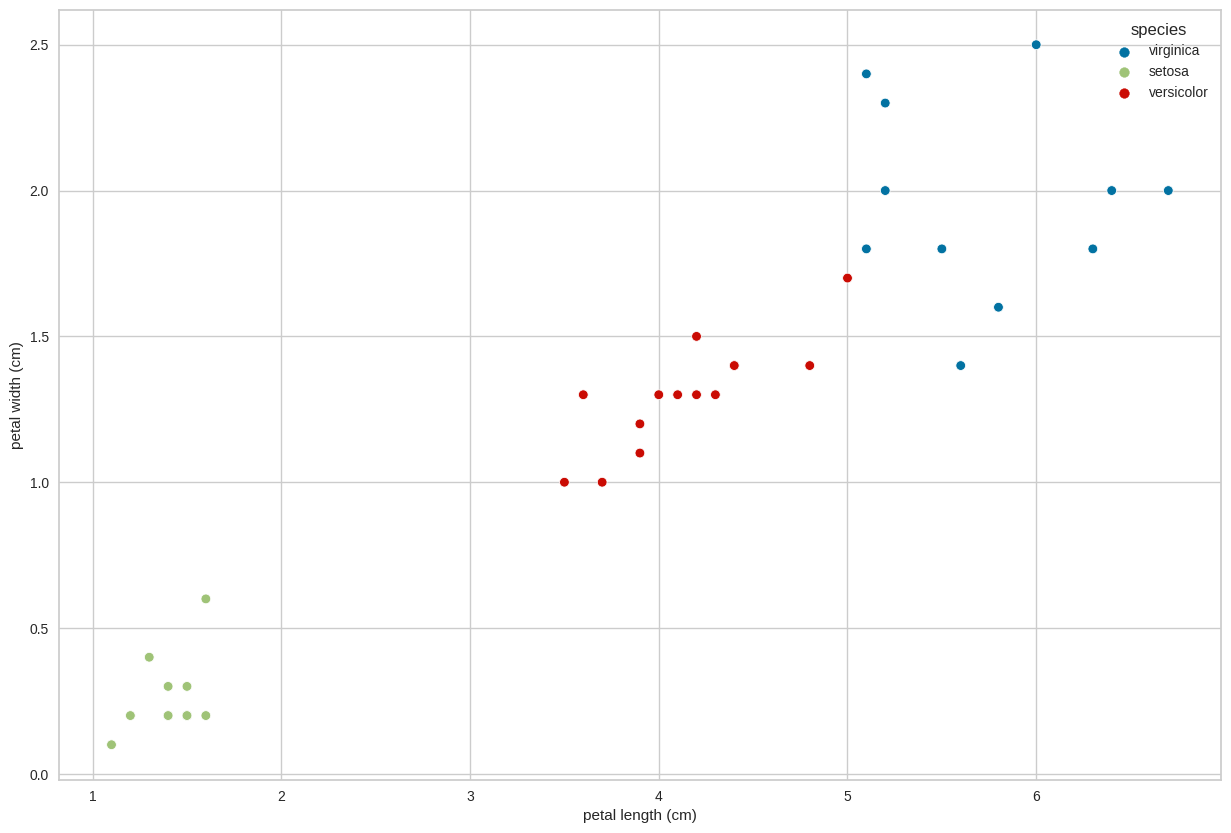

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=test, x='petal length (cm)', y='petal width (cm)', hue='species')

In [ ]:
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow,prediksi_ml
0,5.6,3.0,4.1,1.3,versicolor,0,0
1,6.3,2.7,4.9,1.8,virginica,0,0
2,4.8,3.1,1.6,0.2,setosa,1,1
3,5.7,3.8,1.7,0.3,setosa,1,1
4,5.1,3.8,1.9,0.4,setosa,1,1
...,...,...,...,...,...,...,...
106,5.3,3.7,1.5,0.2,setosa,1,1
107,5.7,3.0,4.2,1.2,versicolor,0,0
108,6.4,3.2,5.3,2.3,virginica,2,2
109,7.7,3.0,6.1,2.3,virginica,2,2


In [ ]:
test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow,prediksi_ml
0,5.8,2.8,5.1,2.4,virginica,0,0
1,5.0,3.5,1.6,0.6,setosa,1,1
2,5.7,2.8,4.1,1.3,versicolor,0,0
3,5.0,3.3,1.4,0.2,setosa,1,1
4,5.9,3.0,5.1,1.8,virginica,0,0
5,4.6,3.1,1.5,0.2,setosa,1,1
6,7.9,3.8,6.4,2.0,virginica,2,2
7,6.4,3.1,5.5,1.8,virginica,2,2
8,6.8,2.8,4.8,1.4,versicolor,2,2
9,7.2,3.0,5.8,1.6,virginica,2,2


### Interpretasi

EDA:
>
Berdasarkan hasil EDA, terlihat pada plot scatter bahwa fitur setosa terlihat jelas tidak beririsan dengan fitur lainnya sedangkan versicolor dan virginca yang beririsan yang membuat hal tersebut dapat memengaruhi model clustering dalam membuat clusternya, lalu pada boxplot terlihat bahwa nilai mean dari simbol berlian ada pada luar box namun terlihat data cukup bersih sehingga tidak dilakukan outlier handling, lalu pada histplot terlihat bahwa untuk sepal terlihat distribusi yang norma, lalu pada petal terlihat condong ke kiri.
>
Parameter:
>
Pada model yang dilakukan , dilakukan penggunaan parameter yang berbeda antara lain:
>
Logistic regression: penalty yaitu regularisasi untuk mencegah overfitt, dipilih l2, c = 1 yaitu invers kekuatan regularisasi dengan nilai 1 yang merupakan besar membuat kekuatan regularisasi lemah maka akan membiarkan titik data individu memiliki pengaruh besar, fit intercept true akan membuat model mempelajari bias, dan solver lbfgs, adalah optimizer yang menghemat memori
>
SVM: kernel linear dipilih karena fungsi kernel yang sederhana dan juga cocok untk banyak fitur, degree dipilih 3 yang merupakan nilai defualt, gamma scale merupakan nilai default = 1 / (n_features * X.var ()). decision func shape=ovr fungsi decision berbentuk (n_samples, n_classes), yang konsisten dengan kebanyakan pengklasifikasi
>
KNN: dipilih n=sebagai jumlah tetangga terdekat, weight uniform yang berarti semua titik dalam lingkungan diberi bobot yang sama, leaf_size untuk memengaruhi kecepatn konstruksi dan kueri, p=2 parameter daya metrik minkowski dengan nilai 2 yang sama dengan euclidean
>
Evaluasi:
>
Pada evaluasi yang telah dilakukan pada model, didapatkan nilai akurasi yang rata rata mendapatkan nilai yang tinggi dengan nilai paling tinggi pada model logistic regresion yaitu 97% pada data test.
>
Perbandingan dengan Label anotator:
>
Berdasarkan evaluasi sebelumnya dipilih hasil dari logistic regresion untuk dibndingkan dengan label anotator, terlihat bahwa dari segi visualisasi hasil dari model sudah baik dimana mampu mengcluster beberapa kelompok walaupun terdapat cluster yang beririsan namun itu minor saja, sebagian besar model sudah mampu memprediksi label dengan benar.

## Link postingan linkedin :